In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install matplotlib numpy
!pip install nltk
!pip install seaborn
!pip install sklearn
!pip install gensim
!pip install pyldavis
!pip install wordcloud
!pip install textblob
!pip install spacey
!pip install textstat
!pip install gensim

import seaborn as sns
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-15 17:12:33.029266: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 1.4 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simp

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import pandas as pd
import numpy as np
import io
import tweepy
import json
import csv
import os
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

import re
import pandas as pd
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
#cleaning
import re
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
# Sentiment Scoring
from textblob import TextBlob
#word cloud
from wordcloud import WordCloud

In [ ]:

#from google.colab import files
#uploaded = files.upload()


In [ ]:
#tweets_df = pd.read_csv(io.BytesIO(uploaded['df_final (1).csv']))

In [ ]:
tweets_df = pd.read_csv("/content/df_final (1).csv")

In [ ]:
tweets_df['tweets'] = tweets_df['tweets'].astype(str)

In [ ]:
print("Running sentiment process")
for row in tweets_df.itertuples():
    tweet = tweets_df.at[row[0], 'tweets']
#run sentiment using TextBlob
    analysis = TextBlob(tweet)
#set value to dataframe
    tweets_df.at[row[0], 'polarity'] = analysis.sentiment[0]
    tweets_df.at[row[0], 'subjectivity'] = analysis.sentiment[1]
#Create Positive / negative column depending on polarity
    if analysis.sentiment[0]>0:
        tweets_df.at[row[0], 'Sentiment'] = "Positive"
    elif analysis.sentiment[0]<0:
        tweets_df.at[row[0], 'Sentiment'] = "Negative"
    else:
        tweets_df.at[row[0], 'Sentiment'] = "Neutral"

Running sentiment process


In [ ]:
tweets_df = tweets_df.drop(columns=['Unnamed: 0'])
tweets_df = tweets_df.drop(columns=['Unnamed: 0.1'])

In [ ]:
tweets_df

,status_id,date,tweets,misinformation,sentiment,polarity,subjectivity,Sentiment
0,1237387231779840000,2020,pags parody plus joe talks coronavirus and has...,1,0,0.246753,0.512987,Positive
1,1240175235304960000,2020,coronavirus shows that racists have absolutely...,1,0,-0.116667,0.477778,Negative
2,1241324844920320000,2020,would expect front line staff to be more of ri...,1,0,0.175000,0.450000,Positive
3,1243024442621440000,2020,the coronavirus is not only affecting the way ...,1,0,0.068182,0.750000,Positive
4,1273803569758720000,2020,hope your father recovers from the virus as so...,1,0,0.000000,1.000000,Neutral
...,...,...,...,...,...,...,...,...
8626,1413088663886573569,2021,"Go ahead, take it...#Vaccine #TheJab #Genocide...",1,0,0.000000,0.000000,Neutral
8627,1413087751474397186,2021,Going to my first vaccine today. Very very ner...,0,0,-0.096667,0.541111,Negative
8628,1413087030578401283,2021,"Media: ""The #Japanese government declared a ne...",0,0,0.045455,0.318182,Positive
8629,1413085519710363648,2021,Getting my first dose vaccine tomorrow. HUKM d...,0,0,0.250000,0.333333,Positive


In [ ]:
tweets_df = tweets_df.drop(columns=['sentiment'])

In [ ]:
tweets_df

,status_id,date,tweets,misinformation,polarity,subjectivity,Sentiment
0,1237387231779840000,2020,pags parody plus joe talks coronavirus and has...,1,0.246753,0.512987,Positive
1,1240175235304960000,2020,coronavirus shows that racists have absolutely...,1,-0.116667,0.477778,Negative
2,1241324844920320000,2020,would expect front line staff to be more of ri...,1,0.175000,0.450000,Positive
3,1243024442621440000,2020,the coronavirus is not only affecting the way ...,1,0.068182,0.750000,Positive
4,1273803569758720000,2020,hope your father recovers from the virus as so...,1,0.000000,1.000000,Neutral
...,...,...,...,...,...,...,...
8626,1413088663886573569,2021,"Go ahead, take it...#Vaccine #TheJab #Genocide...",1,0.000000,0.000000,Neutral
8627,1413087751474397186,2021,Going to my first vaccine today. Very very ner...,0,-0.096667,0.541111,Negative
8628,1413087030578401283,2021,"Media: ""The #Japanese government declared a ne...",0,0.045455,0.318182,Positive
8629,1413085519710363648,2021,Getting my first dose vaccine tomorrow. HUKM d...,0,0.250000,0.333333,Positive


In [ ]:
tweets_df = tweets_df.replace(to_replace="Positive",
           value=1)
tweets_df = tweets_df.replace(to_replace="Negative",
           value=0)

In [ ]:
tweets_df = tweets_df[tweets_df.Sentiment != "Neutral"]

In [ ]:
tweets_df = tweets_df[tweets_df.tweets != "https"]

In [ ]:
tweets_df[tweets_df.Sentiment == 0].tail()

,status_id,date,tweets,misinformation,polarity,subjectivity,Sentiment
8605,1413109840004534275,2021,The woman that gave me the vaccine earlier tod...,0,-0.050000,0.450000,0
8606,1413109792646836230,2021,I was a little nervous before getting my secon...,0,-0.093750,0.250000,0
8617,1413096301034618886,2021,HPV Gardasil Vaccine\nDescribed as 'the most d...,1,-0.050000,0.700000,0
8625,1413089672910213121,2021,Got my second dose of the vaccine! Yay! But al...,0,-0.241071,0.589286,0
8627,1413087751474397186,2021,Going to my first vaccine today. Very very ner...,0,-0.096667,0.541111,0


In [ ]:
tweets_df[tweets_df.Sentiment == 1].tail()

,status_id,date,tweets,misinformation,polarity,subjectivity,Sentiment
8621,1413093526867378181,2021,70% excited. 30% nervous for vaccine appointme...,0,0.375000,0.750000,1
8622,1413093120183476226,2021,"Alhamdulillah, I have no bad side effects or f...",0,0.350000,0.666667,1
8628,1413087030578401283,2021,"Media: ""The #Japanese government declared a ne...",0,0.045455,0.318182,1
8629,1413085519710363648,2021,Getting my first dose vaccine tomorrow. HUKM d...,0,0.250000,0.333333,1
8630,1413085365745774593,2021,I’m so happy that my mom got her first dose va...,0,0.525000,0.666667,1


In [ ]:
tweets_df.to_csv('sentiment_tweets.csv',encoding='utf-8')

In [ ]:
my_df = tweets_df[['tweets','Sentiment']].copy()

In [ ]:
my_df.columns = ['text', 'target']

In [ ]:
sentiment_tweets = pd.read_csv("/content/sentiment_tweets (2).csv")
sentiment_tweets2020 = sentiment_tweets[sentiment_tweets.date == 2020]
sentiment_tweets2020 = sentiment_tweets2020[sentiment_tweets.misinformation == 1]
sentiment_tweets2021 = sentiment_tweets[sentiment_tweets.date == 2021]
sentiment_tweets2021 = sentiment_tweets2021[sentiment_tweets.misinformation == 1]

<ipython-input-23-346e74863699>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sentiment_tweets2020 = sentiment_tweets2020[sentiment_tweets.misinformation == 1]
<ipython-input-23-346e74863699>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sentiment_tweets2021 = sentiment_tweets2021[sentiment_tweets.misinformation == 1]


In [ ]:
my_df = sentiment_tweets2020[['tweets','Sentiment']].copy()
my_df.columns = ['text', 'target']

In [ ]:
my_df

,text,target
0,pags parody plus joe talks coronavirus and has...,1
1,coronavirus shows that racists have absolutely...,0
2,would expect front line staff to be more of ri...,1
3,the coronavirus is not only affecting the way ...,1
12,do you think the coronavirus is natural occurr...,1
...,...,...
2316,what does mask do blocks respiratory droplets ...,1
2317,the main argument getting against my prior thr...,1
2318,feel like this is the video that perfectly dep...,1
2319,more and more,1


sentiment

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(my_df.text)

CountVectorizer()

In [ ]:
len(cvec.get_feature_names_out())

5016

In [ ]:
neg_doc_matrix = cvec.transform(my_df[my_df.target == 0].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))

In [ ]:
pos_doc_matrix = cvec.transform(my_df[my_df.target == 1].text)
pos_tf = np.sum(pos_doc_matrix,axis=0)
pos = np.squeeze(np.asarray(pos_tf))

In [ ]:
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names_out()).transpose()

In [ ]:
term_freq_df

,0,1
aardvark,0,1
aarogya,1,0
abc,1,0
ability,0,1
able,0,5
...,...,...
zombie,1,0
zone,1,0
zoo,0,1
zuckerberg,1,0


In [ ]:
document_matrix = cvec.transform(my_df.text)

In [ ]:
my_df[my_df.target == 0].tail()

,text,target
2300,in spite of past refusals have decided to agai...,0
2301,wuhan china corona virus update disturbing lea...,0
2302,this hartford rally has been very different af...,0
2303,will never ever stop laughing about elon musk ...,0
2311,daniel radcliffe publicist tells me not true,0


In [ ]:
%%time
neg_batches = np.linspace(0,686,10).astype(int)
i=0
neg_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(document_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    neg_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(neg_batches)-2):
        print(neg_batches[i+1],"entries' term freuquency calculated")
    i += 1


76 entries' term freuquency calculated
686 entries' term freuquency calculated
CPU times: user 15.9 ms, sys: 5.2 ms, total: 21.1 ms
Wall time: 18.6 ms


In [ ]:
my_df.tail()

,text,target
2316,what does mask do blocks respiratory droplets ...,1
2317,the main argument getting against my prior thr...,1
2318,feel like this is the video that perfectly dep...,1
2319,more and more,1
2320,today during my weekly press conference told t...,1


In [ ]:
%%time
pos_batches = np.linspace(686,1372,10).astype(int)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(document_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(pos_batches)-2):
        print(pos_batches[i+1],"entries' term freuquency calculated")
    i += 1


762 entries' term freuquency calculated
1372 entries' term freuquency calculated
CPU times: user 19.4 ms, sys: 1.85 ms, total: 21.3 ms
Wall time: 23.8 ms


In [ ]:
pos_batches

array([ 686,  762,  838,  914,  990, 1067, 1143, 1219, 1295, 1372])

In [ ]:
neg = np.sum(neg_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df.head()


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1
aardvark,0,1
aarogya,0,1
abc,1,0
ability,0,1
able,2,3


In [ ]:
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]


,negative,positive,total
the,475,462,937
to,343,296,639
is,260,249,509
of,232,223,455
covid,221,213,434
and,215,176,391
coronavirus,266,100,366
in,123,162,285
it,170,102,272
for,142,116,258


In [ ]:
term_freq_df.to_csv('term_freq_df.csv',encoding='utf-8')

In [ ]:
my_df['text'] = my_df['text'].str.replace('https', '')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(my_df.text)



CountVectorizer(max_features=10000, stop_words='english')

In [ ]:
document_matrix = cvec.transform(my_df.text)

In [ ]:
%%time
neg_batches = np.linspace(0,686,10).astype(int)
i=0
neg_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(document_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    neg_tf.append(batch_result)
    print(neg_batches[i+1],"entries' term freuquency calculated")
    i += 1





76 entries' term freuquency calculated
152 entries' term freuquency calculated
228 entries' term freuquency calculated
304 entries' term freuquency calculated
381 entries' term freuquency calculated
457 entries' term freuquency calculated
533 entries' term freuquency calculated
609 entries' term freuquency calculated
686 entries' term freuquency calculated
CPU times: user 22.2 ms, sys: 2.1 ms, total: 24.3 ms
Wall time: 22.2 ms


In [ ]:
%%time
pos_batches = np.linspace(686,1372,10).astype(int)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(document_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    print(pos_batches[i+1],"entries' term freuquency calculated")
    i += 1

762 entries' term freuquency calculated
838 entries' term freuquency calculated
914 entries' term freuquency calculated
990 entries' term freuquency calculated
1067 entries' term freuquency calculated
1143 entries' term freuquency calculated
1219 entries' term freuquency calculated
1295 entries' term freuquency calculated
1372 entries' term freuquency calculated
CPU times: user 29.1 ms, sys: 1.04 ms, total: 30.1 ms
Wall time: 32.4 ms


In [ ]:
neg = np.sum(neg_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
term_freq_df2 = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df2.columns = ['negative', 'positive']
term_freq_df2['total'] = term_freq_df2['negative'] + term_freq_df2['positive']
term_freq_df2.sort_values(by='total', ascending=False).iloc[:10]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,negative,positive,total
covid,221,213,434
coronavirus,266,100,366
trump,94,45,139
people,48,54,102
cure,73,28,101
bleach,84,13,97
fake,24,67,91
bioweapon,61,14,75
just,40,34,74
immune,33,39,72


In [ ]:
term_freq_df2 = term_freq_df2[term_freq_df2.total <= 300]

In [ ]:
term_freq_df2.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
trump,94,45,139
people,48,54,102
cure,73,28,101
bleach,84,13,97
fake,24,67,91
bioweapon,61,14,75
just,40,34,74
immune,33,39,72
news,21,39,60
garlic,46,12,58


Text(0.5, 1.0, 'Top 50 tokens in negative tweets')

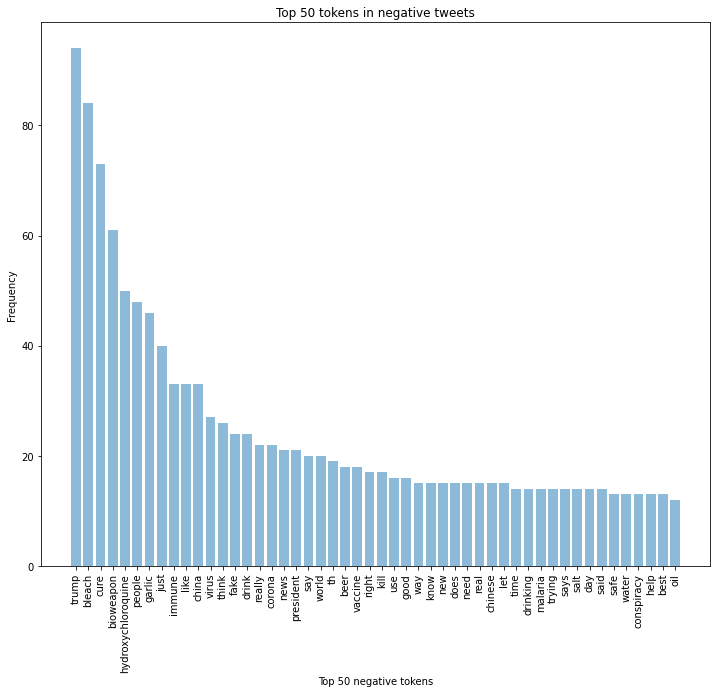

In [ ]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets')

Text(0.5, 1.0, 'Top 50 tokens in positive tweets')

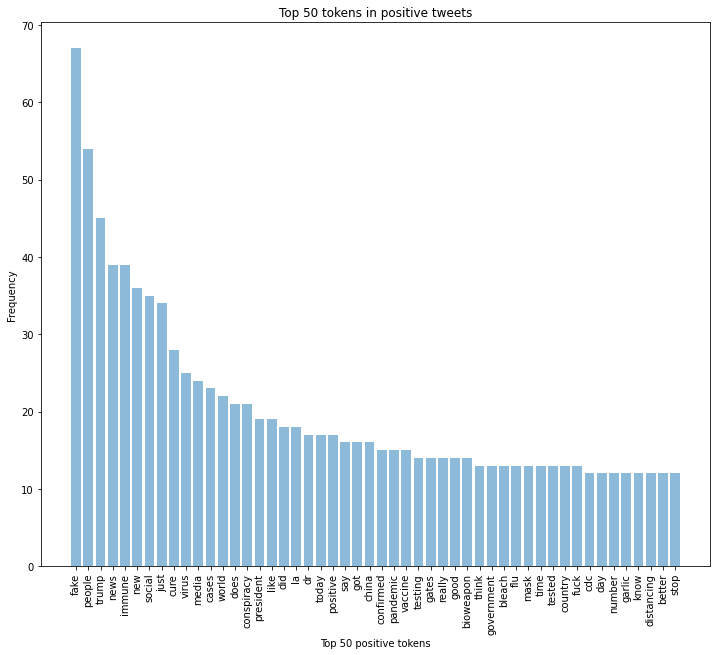

In [ ]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive tweets')

AttributeError: ignored

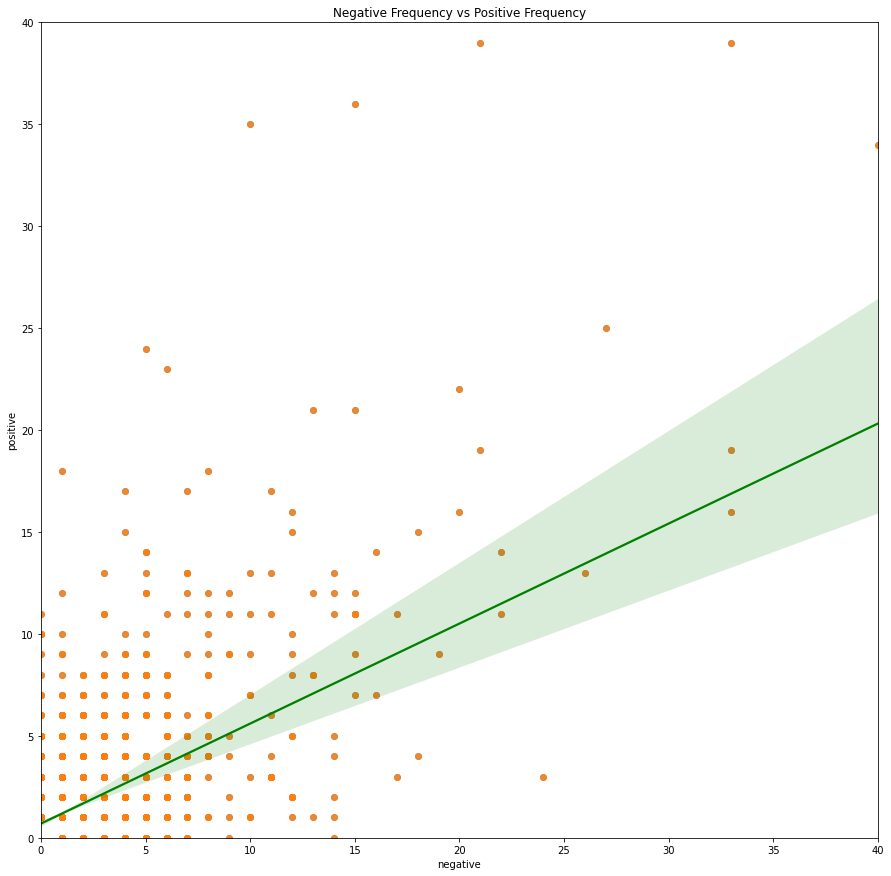

In [ ]:
import seaborn as sns
import scipy as sp
plt.figure(figsize=(15,15))
ax = sns.regplot(x="negative", y="positive",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')
ax.set_xlim(0, 40)
ax.set_ylim(0, 40)
p2 = sns.regplot(data=term_freq_df2, x='negative', y='positive', line_kws={'color': 'g'})



In [ ]:
term_freq_df2['pos_rate'] = term_freq_df2['positive'] * 1./term_freq_df2['total']
term_freq_df2.sort_values(by='pos_rate', ascending=False).iloc[:10]

,negative,positive,total,pos_rate
aardvark,0,1,1,1.0
moments,0,1,1,1.0
mars,0,1,1,1.0
marzo,0,2,2,1.0
mas,0,1,1,1.0
mascarillas,0,1,1,1.0
masjid,0,2,2,1.0
massive,0,1,1,1.0
mate,0,1,1,1.0
math,0,1,1,1.0


In [ ]:
term_freq_df2['pos_freq_pct'] = term_freq_df2['positive'] * 1./term_freq_df2['positive'].sum()
term_freq_df2.sort_values(by='pos_freq_pct', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct
fake,24,67,91,0.736264,0.010608
people,48,54,102,0.529412,0.008550
trump,94,45,139,0.323741,0.007125
news,21,39,60,0.650000,0.006175
immune,33,39,72,0.541667,0.006175
new,15,36,51,0.705882,0.005700
social,10,35,45,0.777778,0.005541
just,40,34,74,0.459459,0.005383
cure,73,28,101,0.277228,0.004433
virus,27,25,52,0.480769,0.003958


In [ ]:
from scipy.stats import hmean

term_freq_df2['pos_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['pos_rate'], x['pos_freq_pct']])
                                                                   if x['pos_rate'] > 0 and x['pos_freq_pct'] > 0
                                                                   else 0), axis=1)
term_freq_df2.sort_values(by='pos_hmean', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean
fake,24,67,91,0.736264,0.010608,0.020915
people,48,54,102,0.529412,0.008550,0.016828
trump,94,45,139,0.323741,0.007125,0.013943
news,21,39,60,0.650000,0.006175,0.012233
immune,33,39,72,0.541667,0.006175,0.012210
new,15,36,51,0.705882,0.005700,0.011308
social,10,35,45,0.777778,0.005541,0.011005
just,40,34,74,0.459459,0.005383,0.010642
cure,73,28,101,0.277228,0.004433,0.008727
virus,27,25,52,0.480769,0.003958,0.007852


In [ ]:
from scipy.stats import norm
def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())

term_freq_df2['pos_rate_normcdf'] = normcdf(term_freq_df2['pos_rate'])
term_freq_df2['pos_freq_pct_normcdf'] = normcdf(term_freq_df2['pos_freq_pct'])
term_freq_df2['pos_normcdf_hmean'] = hmean([term_freq_df2['pos_rate_normcdf'], term_freq_df2['pos_freq_pct_normcdf']])
term_freq_df2.sort_values(by='pos_normcdf_hmean', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean
video,0,11,11,1.000000,0.001742,0.003477,0.848167,0.999798,0.917762
que,0,10,10,1.000000,0.001583,0.003162,0.848167,0.999242,0.917527
important,0,10,10,1.000000,0.001583,0.003162,0.848167,0.999242,0.917527
circulating,0,9,9,1.000000,0.001425,0.002846,0.848167,0.997492,0.916789
reported,0,8,8,1.000000,0.001267,0.002530,0.848167,0.992666,0.914745
ncov,0,7,7,1.000000,0.001108,0.002214,0.848167,0.981005,0.909763
million,0,7,7,1.000000,0.001108,0.002214,0.848167,0.981005,0.909763
la,1,18,19,0.947368,0.002850,0.005683,0.818631,1.000000,0.900272
official,0,6,6,1.000000,0.000950,0.001898,0.848167,0.956317,0.899001
es,0,6,6,1.000000,0.000950,0.001898,0.848167,0.956317,0.899001


In [ ]:
term_freq_df2['neg_rate'] = term_freq_df2['negative'] * 1./term_freq_df2['total']
term_freq_df2['neg_freq_pct'] = term_freq_df2['negative'] * 1./term_freq_df2['negative'].sum()
term_freq_df2['neg_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['neg_rate'], x['neg_freq_pct']])
                                                                   if x['neg_rate'] > 0 and x['neg_freq_pct'] > 0
                                                                   else 0), axis=1)
term_freq_df2['neg_rate_normcdf'] = normcdf(term_freq_df2['neg_rate'])
term_freq_df2['neg_freq_pct_normcdf'] = normcdf(term_freq_df2['neg_freq_pct'])
term_freq_df2['neg_normcdf_hmean'] = hmean([term_freq_df2['neg_rate_normcdf'], term_freq_df2['neg_freq_pct_normcdf']])
term_freq_df2.sort_values(by='neg_normcdf_hmean', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean,neg_rate,neg_freq_pct,neg_hmean,neg_rate_normcdf,neg_freq_pct_normcdf,neg_normcdf_hmean
malaria,14,0,14,0.000000,0.000000,0.000000,0.110892,0.314349,0.163948,1.000000,0.002301,0.004591,0.889108,0.999886,0.941249
leader,9,0,9,0.000000,0.000000,0.000000,0.110892,0.314349,0.163948,1.000000,0.001479,0.002954,0.889108,0.987376,0.935669
salt,14,1,15,0.066667,0.000158,0.000316,0.141911,0.453011,0.216120,0.933333,0.002301,0.004590,0.858089,0.999886,0.923576
water,13,1,14,0.071429,0.000158,0.000316,0.144332,0.453011,0.218917,0.928571,0.002136,0.004263,0.855668,0.999658,0.922075
drug,12,1,13,0.076923,0.000158,0.000316,0.147160,0.453011,0.222154,0.923077,0.001972,0.003936,0.852840,0.999053,0.920174
advice,7,0,7,0.000000,0.000000,0.000000,0.110892,0.314349,0.163948,1.000000,0.001150,0.002298,0.889108,0.951372,0.919187
amid,7,0,7,0.000000,0.000000,0.000000,0.110892,0.314349,0.163948,1.000000,0.001150,0.002298,0.889108,0.951372,0.919187
hydroxychloroquine,50,5,55,0.090909,0.000792,0.001570,0.154525,0.910519,0.264211,0.909091,0.008217,0.016287,0.845475,1.000000,0.916268
idiot,10,1,11,0.090909,0.000158,0.000316,0.154525,0.453011,0.230444,0.909091,0.001643,0.003281,0.845475,0.994252,0.913847
cocaine,10,1,11,0.090909,0.000158,0.000316,0.154525,0.453011,0.230444,0.909091,0.001643,0.003281,0.845475,0.994252,0.913847


Text(0.5, 1.0, 'neg_hmean vs pos_hmean')

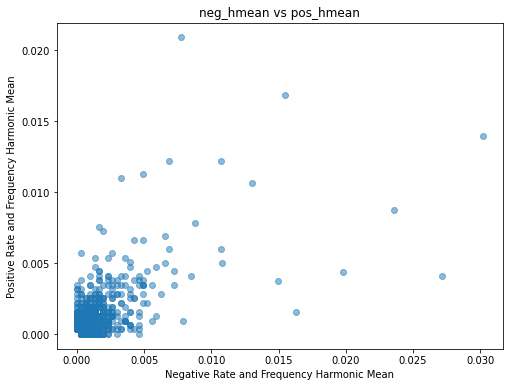

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_hmean", y="pos_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Rate and Frequency Harmonic Mean')
plt.xlabel('Negative Rate and Frequency Harmonic Mean')
plt.title('neg_hmean vs pos_hmean')

Text(0.5, 1.0, 'neg_normcdf_hmean vs pos_normcdf_hmean')

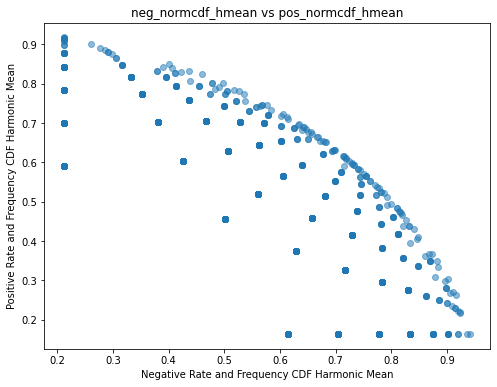

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_normcdf_hmean", y="pos_normcdf_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Rate and Frequency CDF Harmonic Mean')
plt.xlabel('Negative Rate and Frequency CDF Harmonic Mean')
plt.title('neg_normcdf_hmean vs pos_normcdf_hmean')


In [ ]:

from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.models import LinearColorMapper
output_notebook()
color_mapper = LinearColorMapper(palette='Inferno256', low=min(term_freq_df2.pos_normcdf_hmean), high=max(term_freq_df2.pos_normcdf_hmean))
p = figure(x_axis_label='neg_normcdf_hmean', y_axis_label='pos_normcdf_hmean')
p.circle('neg_normcdf_hmean','pos_normcdf_hmean',size=5,alpha=0.3,source=term_freq_df2,color={'field': 'pos_normcdf_hmean', 'transform': color_mapper})
from bokeh.models import HoverTool
hover = HoverTool(tooltips=[('token','@index')])
p.add_tools(hover)
show(p)